# SafeCard ai

Our platform uses advanced AI algorithms to enhance fraud detection, providing businesses and individuals with tools to safeguard their financial transactions. Explore how we use data to make digital payments more secure for everyone

### Import some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Load the Dataset

In [2]:
data = pd.read_csv("data/card_transdata.csv")

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0,0.0
1,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0,0.0
2,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0,0.0
3,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0,0.0
4,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the balance of the dataset

In [6]:
# Check class distribution of the target variable 'fraud'
fraud_distribution = data['fraud'].value_counts(normalize=True)

fraud_distribution


fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64

#### Check the number of rows

In [7]:
print(f"Number of samples (rows): {data.shape[0]}")

Number of samples (rows): 1000000


## Undersampling the dataset

From this dataset it is too large with 1 000,000 entries which will take much time for EDA and training the model also for the purpose of this project of ML pipeline where we want to create user website where they can retrain the model this is crucial because we don't want the user wait for a long time while training the model.

In [4]:
# Separate fraud and non-fraud samples
fraud_data = data[data['fraud'] == 1]
non_fraud_data = data[data['fraud'] == 0]

# Determine the number of samples per class
fraud_sample_size = int(0.2 * 2000)
non_fraud_sample_size = 2000 - fraud_sample_size

# Randomly sample from each class
fraud_sample = fraud_data.sample(n=fraud_sample_size, random_state=42)
non_fraud_sample = non_fraud_data.sample(n=non_fraud_sample_size, random_state=42)

# Combine the samples
small_sample = pd.concat([fraud_sample, non_fraud_sample])

print(f"Sampled Data Shape: {small_sample.shape}")
print(small_sample['fraud'].value_counts(normalize=True))


Sampled Data Shape: (2000, 8)
fraud
0.0    0.8
1.0    0.2
Name: proportion, dtype: float64


In [17]:
small_sample.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
909977,25.920200,10.792762,9.541436,1.0,0.0,0.0,1.0,1.0
649305,129.610251,1.132247,0.802504,1.0,0.0,0.0,1.0,1.0
364031,117.420499,4.914930,0.321369,1.0,0.0,0.0,1.0,1.0
161491,176.667414,1.229757,3.845739,1.0,0.0,0.0,1.0,1.0
65707,26.138134,0.875708,9.752672,1.0,0.0,0.0,1.0,1.0


In [ ]:
# small_sample.to_csv("card_transdata.csv", index=False)

In [18]:
small_sample.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
486179,12.820098,3.173788,0.658664,1.0,1.0,0.0,1.0,0.0
855511,7.199528,4.116147,2.660535,1.0,0.0,0.0,0.0,0.0
366663,1.083938,1.039134,0.877950,0.0,0.0,0.0,0.0,0.0
208939,19.008677,0.705764,0.601420,1.0,1.0,0.0,1.0,0.0
520404,10.509303,6.521268,1.227384,1.0,0.0,0.0,0.0,0.0


### EDA(Exploratory Data Analysis)

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\679776423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(small_sample['fraud'], palette='viridis')


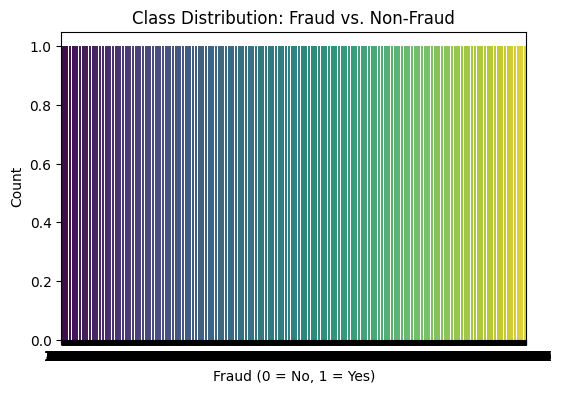

In [19]:
# Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(small_sample['fraud'], palette='viridis')
plt.title("Class Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [20]:
# Check for Missing Values
missing_values = small_sample.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


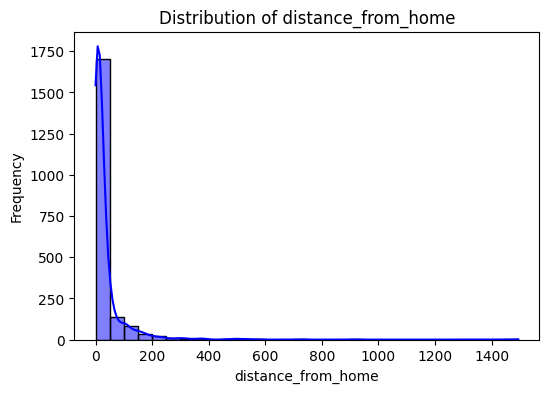

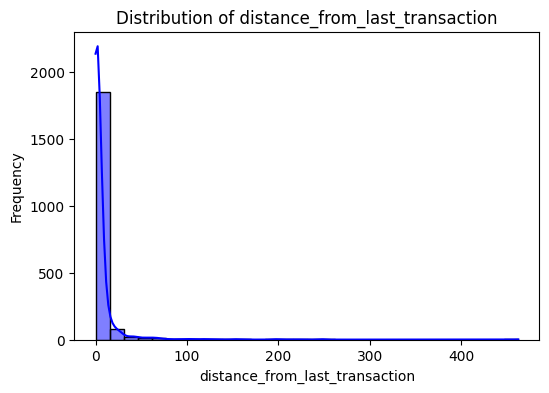

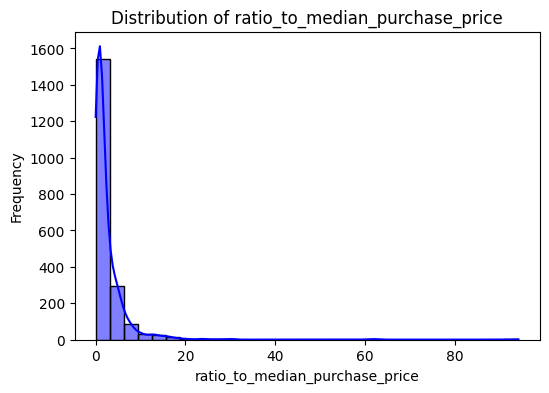

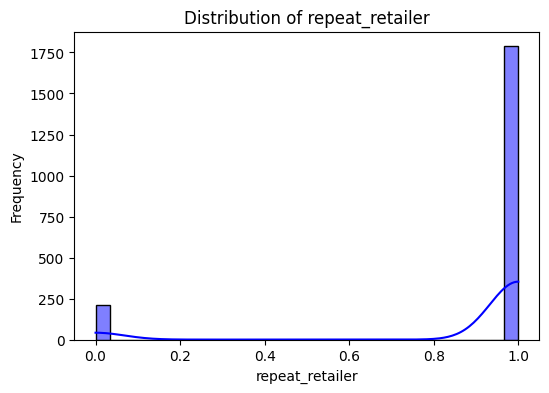

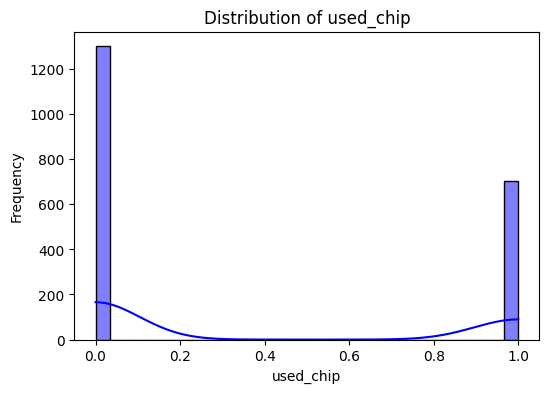

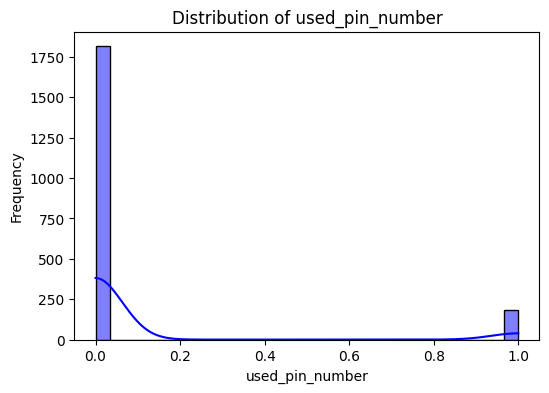

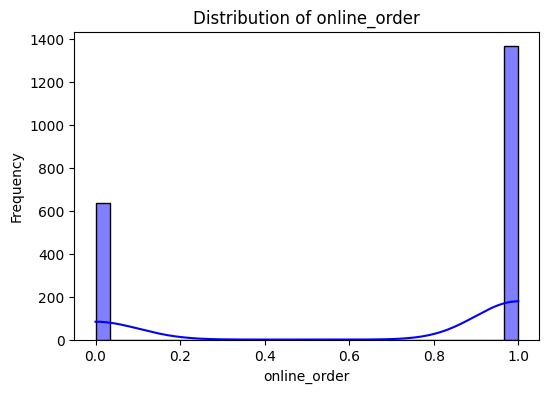

In [29]:
# Feature Distributions
import os

# Create a directory to save the images
output_dir = "saved_plots"
os.makedirs(output_dir, exist_ok=True)

# Generate and save distribution plots
for column in data.columns:
    if column != 'fraud':
        plt.figure(figsize=(6, 4))
        sns.histplot(small_sample[column], kde=True, bins=30, color="blue")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
        # Save the plot as an image
        filename = os.path.join(output_dir, f"{column}_distribution.png")
        plt.savefig(filename, bbox_inches="tight")
        
        # Show the plot
        plt.show()


C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\3404221230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")


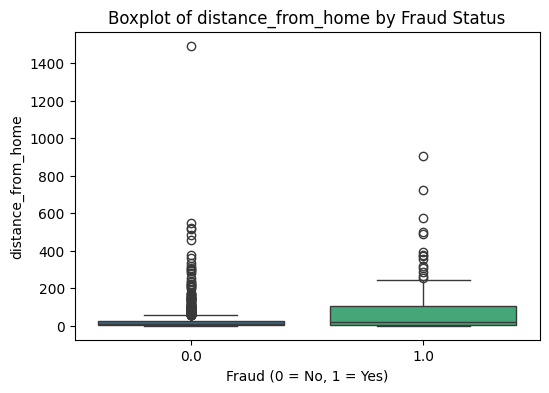

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\3404221230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")


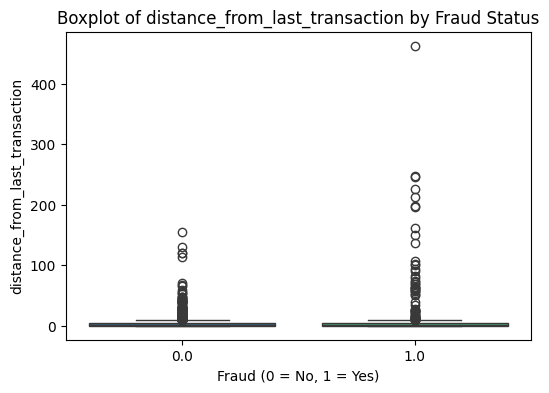

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\3404221230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")


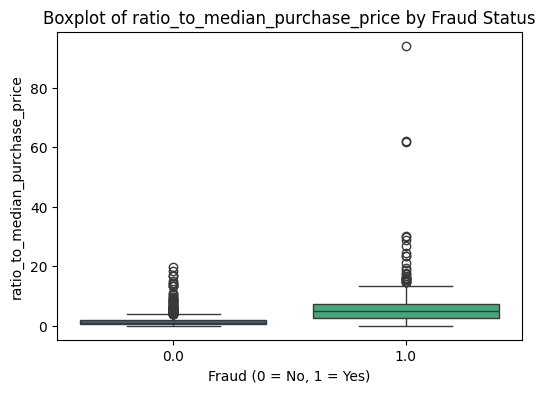

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\3404221230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")


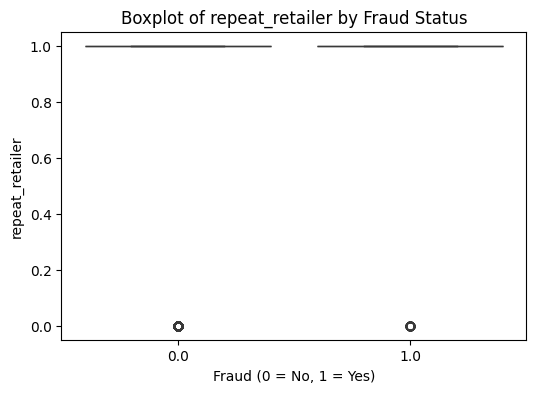

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\3404221230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")


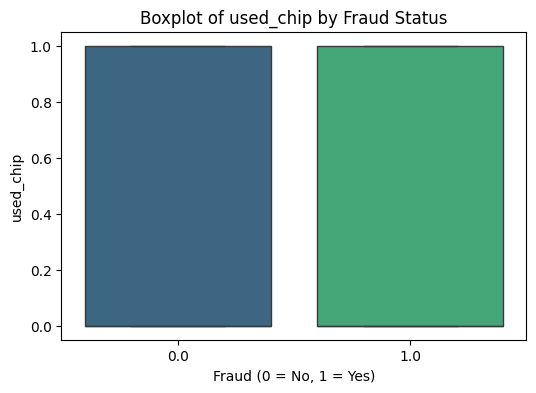

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\3404221230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")


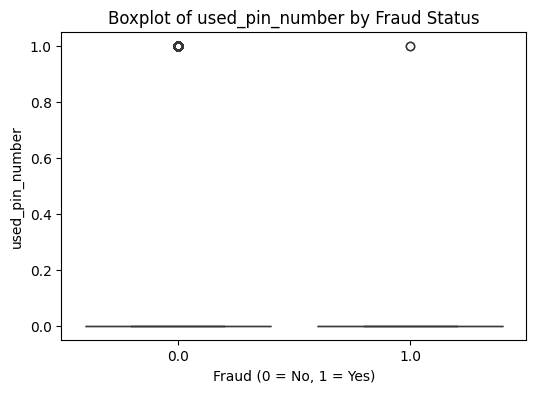

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\3404221230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")


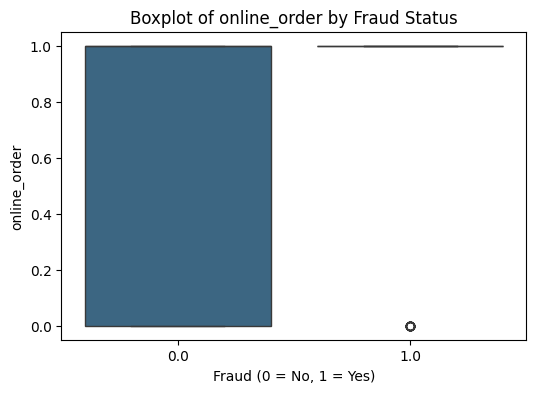

In [ ]:
# Boxplots for Outlier Detection
for column in data.columns:
    if column != 'fraud':
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=small_sample, x='fraud', y=column, palette="viridis")
        plt.title(f"Boxplot of {column} by Fraud Status")
        plt.xlabel("Fraud (0 = No, 1 = Yes)")
        plt.ylabel(column)
        plt.show()

## Other EDA to use in the Pipeline

In [34]:
# Create a directory to save the images
eda_output_dir = "saved_plots"
os.makedirs(eda_output_dir, exist_ok=True)


# 1. Box Plot
def plot_boxplot(data, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=column, palette='Set2')
    sns.despine()
    plt.title(f'Box Plot of {column}')
    plt.savefig(os.path.join(eda_output_dir, f"{column}_boxplot.png"), bbox_inches='tight')
    plt.show()

# 2. Histogram
def plot_histogram(data, column):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=column, kde=True, color='purple')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    sns.despine()
    plt.savefig(os.path.join(eda_output_dir, f"{column}_histogram.png"), bbox_inches='tight')
    plt.show()

# 3. Scatter Plot
def plot_scatterplot(data, column1, column2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=column1, y=column2, color='green')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Scatter Plot of {column1} vs {column2}')
    sns.despine()
    plt.savefig(os.path.join(eda_output_dir, f"{column1}_vs_{column2}_scatterplot.png"), bbox_inches='tight')
    plt.show()

# 4. Correlation Heatmap
def plot_heatmap(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt=".2f")
    plt.title('Correlation Heatmap')
    sns.despine()
    plt.savefig(os.path.join(eda_output_dir, "correlation_heatmap.png"), bbox_inches='tight')
    plt.show()

# 5. Synthetic Sequential Plot
def plot_synthetic_timeseries(data, index_column, column):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x=index_column, y=column, color='red')
    plt.xlabel(index_column.capitalize())
    plt.ylabel(column.capitalize())
    plt.title(f'Trend of {column.capitalize()} Over {index_column.capitalize()}')
    sns.despine()
    plt.savefig(os.path.join(eda_output_dir, f"{column}_trend.png"), bbox_inches='tight')
    plt.show()

# 6. Count Plot
def plot_countplot(data, column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, palette='pastel')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    sns.despine()
    plt.savefig(os.path.join(eda_output_dir, f"{column}_countplot.png"), bbox_inches='tight')
    plt.show()

# 7. Pair Plot
def plot_pairplot(data, columns):
    sns.pairplot(data=data, vars=columns, diag_kind='kde', palette='husl')
    plt.savefig(os.path.join(eda_output_dir, f"pairplot_{'_'.join(columns)}.png"), bbox_inches='tight')
    plt.show()

# 8. Violin Plot
def plot_violin(data, column, hue=None):
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=data, x=column, hue=hue, split=True, palette='muted')
    plt.title(f'Violin Plot of {column}')
    plt.savefig(os.path.join(eda_output_dir, f"{column}_violinplot.png"), bbox_inches='tight')
    plt.show()

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\1640515488.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=column, palette='Set2')


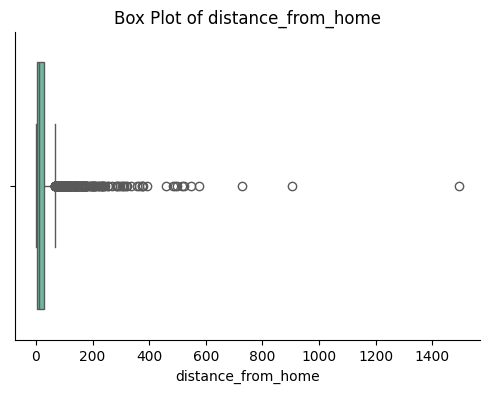

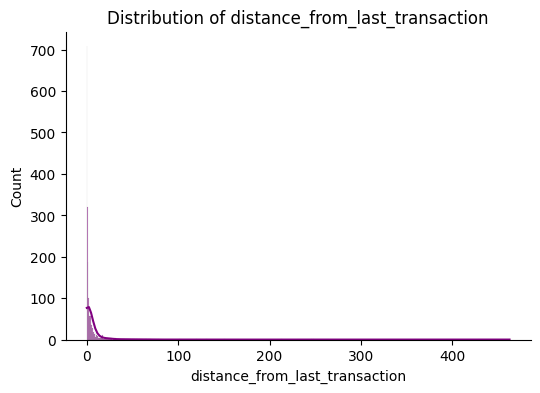

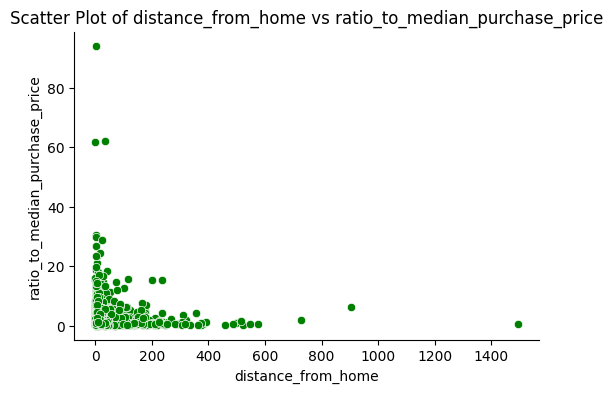

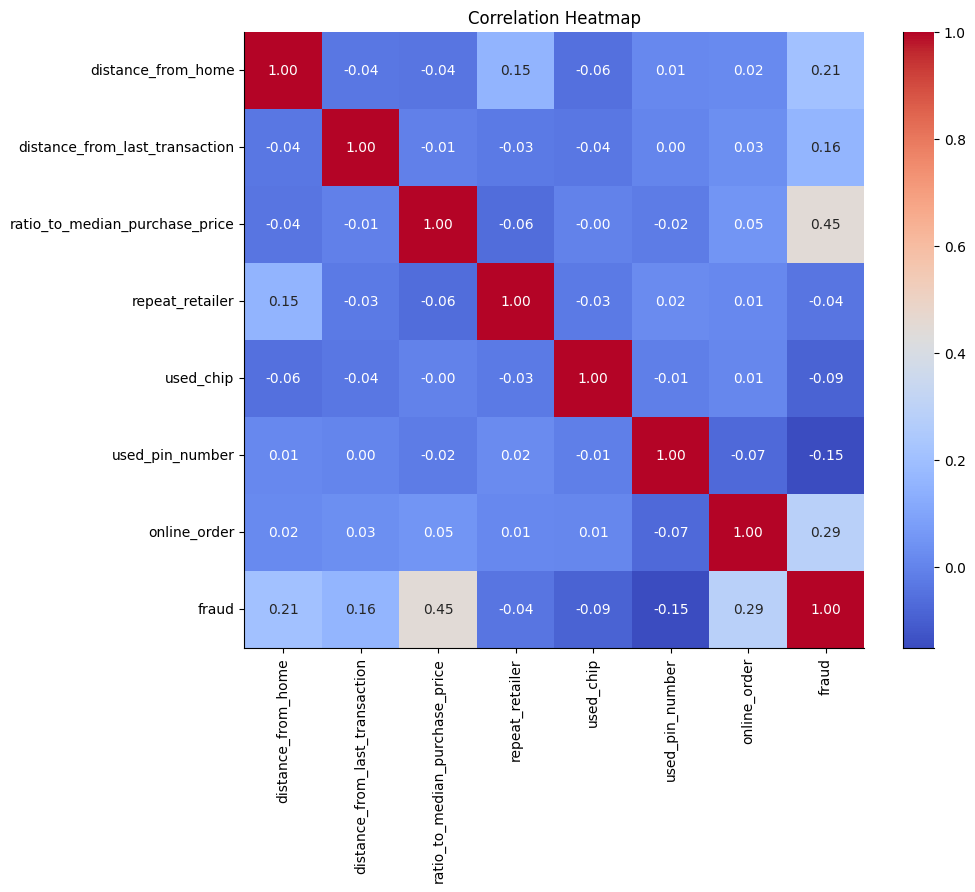

C:\Users\ElvisGuy\AppData\Local\Temp\ipykernel_19264\1640515488.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='pastel')


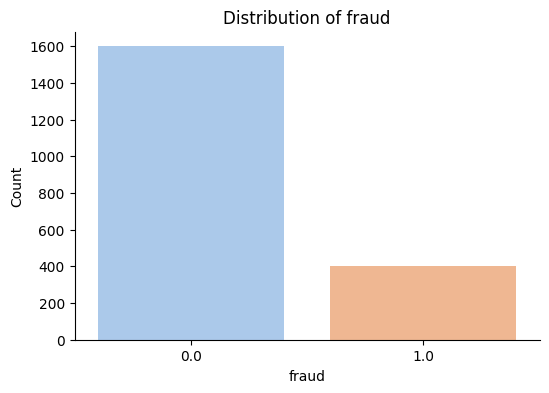

c:\Users\ElvisGuy\.conda\envs\primary\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ElvisGuy\.conda\envs\primary\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ElvisGuy\.conda\envs\primary\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\ElvisGuy\.conda\envs\primary\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\ElvisGuy\.conda\envs\primary\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\ElvisGuy\.conda\envs\primary\Lib\site-packages

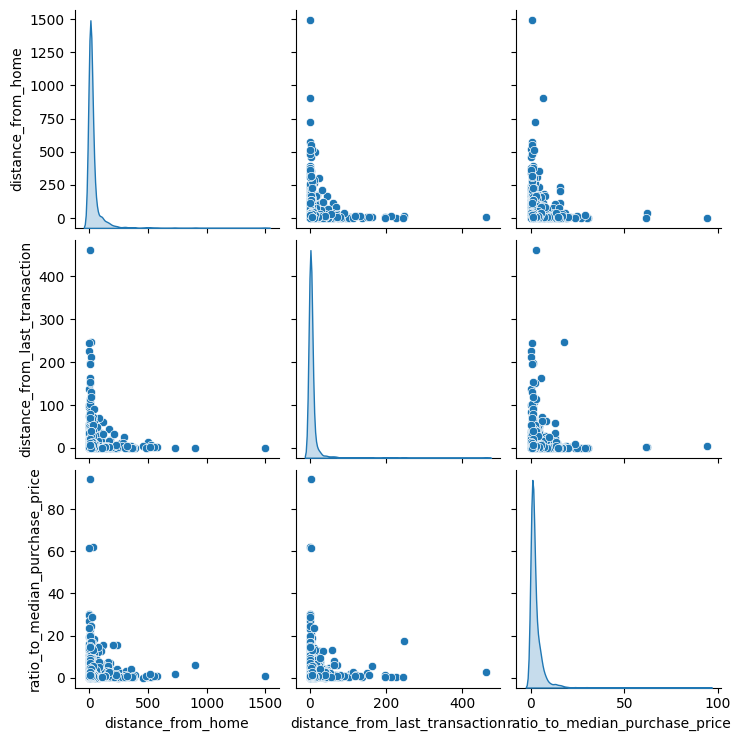

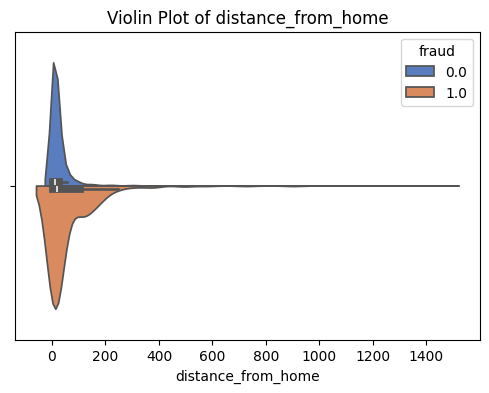

In [36]:
# Example usage with a sample DataFrame
# Generate various plots
plot_boxplot(small_sample, 'distance_from_home')
plot_histogram(small_sample, 'distance_from_last_transaction')
plot_scatterplot(small_sample, 'distance_from_home', 'ratio_to_median_purchase_price')
plot_heatmap(small_sample)
plot_countplot(small_sample, 'fraud')
plot_pairplot(small_sample, ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'])
plot_violin(small_sample, 'distance_from_home', hue='fraud')


In [23]:
# Data Preprocessing
# Separate Features and Target
X = small_sample.drop(columns='fraud')
y = small_sample['fraud']

In [24]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Defining the Models

In [26]:
# Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# XGBoost
fraud_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(scale_pos_weight=fraud_ratio, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)


c:\Users\ElvisGuy\.conda\envs\primary\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## Evaluating the models


--- Logistic Regression ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96       480
         1.0       0.76      0.97      0.85       120

    accuracy                           0.93       600
   macro avg       0.87      0.94      0.90       600
weighted avg       0.94      0.93      0.93       600

ROC-AUC: 0.9785


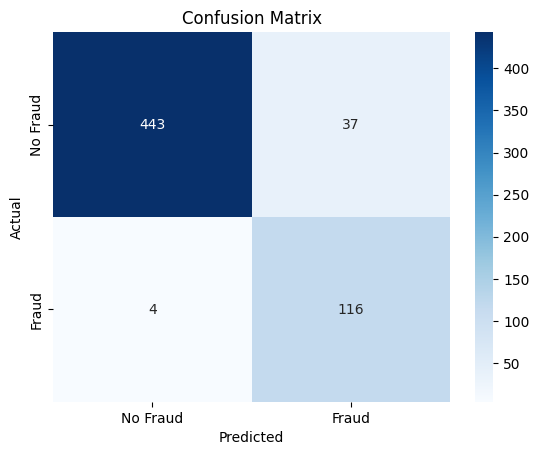

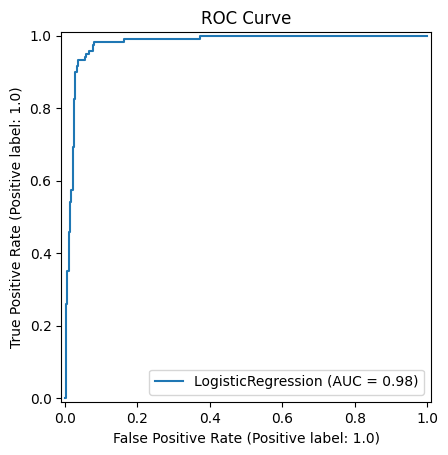


--- Random Forest ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       480
         1.0       1.00      0.96      0.98       120

    accuracy                           0.99       600
   macro avg       0.99      0.98      0.99       600
weighted avg       0.99      0.99      0.99       600

ROC-AUC: 0.9995


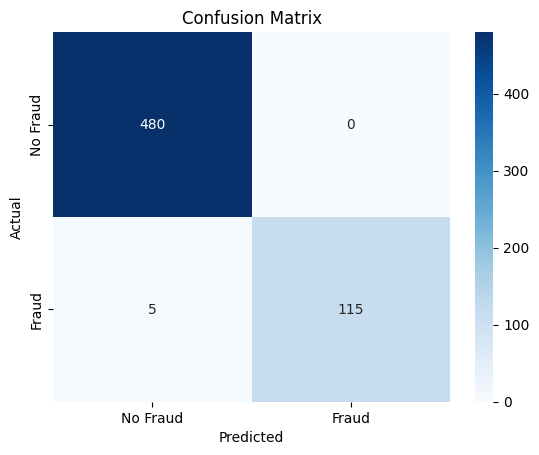

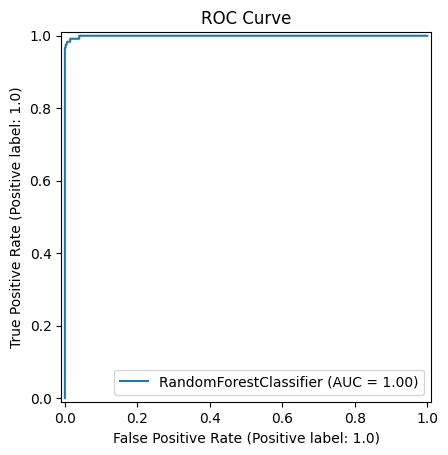


--- XGBoost ---

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       480
         1.0       0.96      0.98      0.97       120

    accuracy                           0.99       600
   macro avg       0.98      0.99      0.98       600
weighted avg       0.99      0.99      0.99       600

ROC-AUC: 0.9987


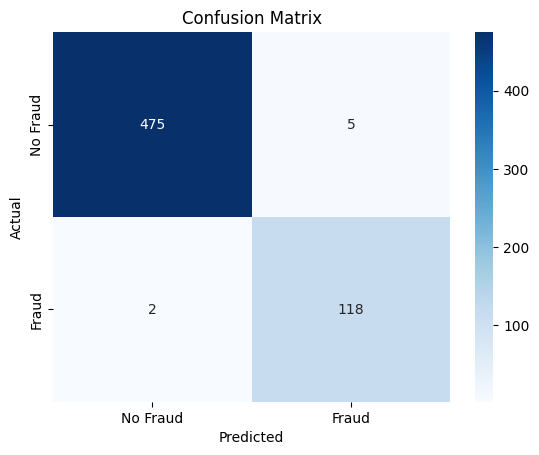

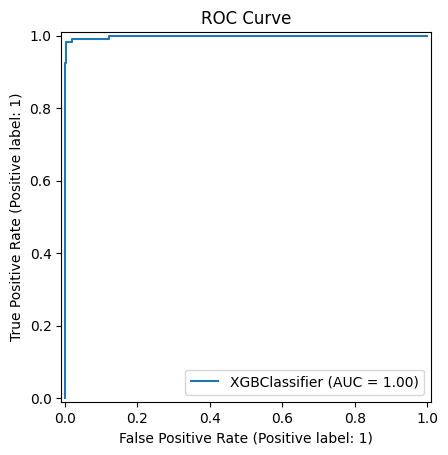

In [27]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title("ROC Curve")
    plt.show()

# Evaluate Logistic Regression
print("\n--- Logistic Regression ---")
evaluate_model(lr, X_test_scaled, y_test)

# Evaluate Random Forest
print("\n--- Random Forest ---")
evaluate_model(rf, X_test_scaled, y_test)

# Evaluate XGBoost
print("\n--- XGBoost ---")
evaluate_model(xgb, X_test_scaled, y_test)


### Saving the model to use
 As the model trained using Random Forest seem to work better than other models. It is the one that is going to be used in the pipeline.

In [ ]:
# import pickle

# # Save the trained models
# with open('saved_models/logistic_regression_model.pkl', 'wb') as f:
#     pickle.dump(lr, f)

# with open('saved_models/random_forest_model.pkl', 'wb') as f:
#     pickle.dump(rf, f)

# with open('saved_models/xgboost_model.pkl', 'wb') as f:
#     pickle.dump(xgb, f)

# print("Models saved successfully!")

Models saved successfully!
